# Ackley Function

The [Ackley](https://en.wikipedia.org/wiki/Ackley_function) function is a common test problem for optimization problems with many local minima:
\begin{equation*}
f(x, y)= -20 exp [-0.2\sqrt{0.5(x^2+y^2)}]-exp[0.5\{cos(2 \pi x) + cos(2 \pi y)\}]+ e +20
\end{equation*}

In the following problem tasks we will use pytorch to evaluate this function numerically and study its behavior under common gradient descent techniques.

Topics to cover:

- Define ACkley as a python function
- Use a previously defined function to plot in 3d (zoomed up)
- Use a previously defined function to plot in 3d (zoomed out)
- Explain the function

In [10]:
# Plotting the Ackley Function using Numpy

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

%pylab inline
import torch
import torch.nn as nn

def ackley(x, y):
    sum_sq_term = -20 * np.exp(-0.2*np.sqrt(0.5*(x*x+y*y)))
    cos_term = -np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y)))
    value = sum_sq_term+cos_term+np.exp(1)+20
    return value

Populating the interactive namespace from numpy and matplotlib


C:\Users\Niranjana\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_masked\__init__.py:223: UserWarning: Failed to initialize NumPy: module compiled against API version 0xf but this version of numpy is 0xe (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  example_input = torch.tensor([[-3, -2, -1], [0, 1, 2]])


In [4]:

# function to plot the data
def plot_ackley_3d(x, y):
    # set the figure up
    fig = plt.figure()
    # setup a 3d plt
    ax = fig.gca(projection='3d')
    # Make data uing a meshgrid
    x, y = np.meshgrid(x, y)
    # call the ackley function
    z = ackley(x, y)
    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap=cm.cividis,
                                   linewidth=0, antialiased=False)
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()




C:\Users\NIRANJ~1\AppData\Local\Temp/ipykernel_29384/3634165507.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


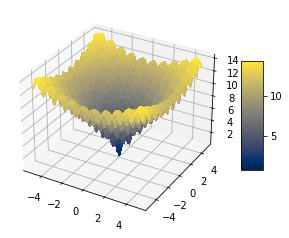

In [6]:
# Use a previously defined function to plot in 3d (zoomed up)
# Imput data points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
# call the plot 
plot_ackley_3d(x, y)


C:\Users\NIRANJ~1\AppData\Local\Temp/ipykernel_29384/3634165507.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


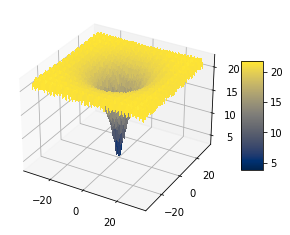

In [5]:
# Use a previously defined function to plot in 3d (zoomed up)
# Imput data points
x = np.linspace(-32, 32, 100)
y = np.linspace(-32, 32, 100)
# call the plot 
plot_ackley_3d(x, y)

C:\Users\NIRANJ~1\AppData\Local\Temp/ipykernel_29384/3634165507.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


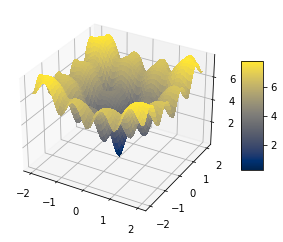

In [7]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

plot_ackley_3d(x, y)

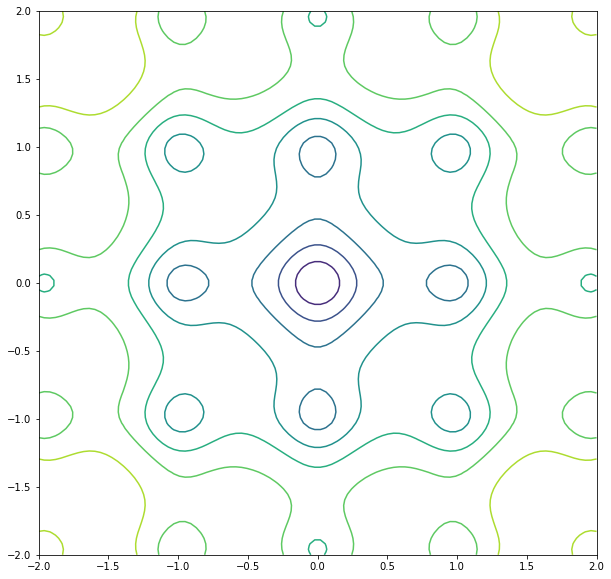

In [8]:
# plot the funtion as a contour plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = ackley(X,Y)
plt.figure(figsize=(10,10))
plt.contour(X,Y,Z)


# USE ACKLEY IN PYTORCH

Steps
- Define ackley as a pytorch nn module
- Find the global minimum using gradient descent
    - plot the function value as a function of iteration number 
    - plot the norms of the gradients 
- For 10 random postiions plot the ackley function 

In [11]:
# Define the Ackley-Function as a pytorch nn.Module class

class Ackley(nn.Module):
    
    # initialize the class with a constructor 
    def __init__(self):
        super().__init__()
        
    #define the forward function    
    def forward(self,coords):
        
        # define the a and y coordinates
        x = coords[:, 0] # they are arrays that can be computed in groups
        y = coords[:, 1] # instead of one at a time as we defined before
        
        # define the formula
        sum_sq_term = -20 * torch.exp(-0.2*torch.sqrt(0.5*(x*x+y*y))) # = -20 * np.exp(-0.2*np.sqrt(0.5*(x*x+y*y))) 
        cos_term = -torch.exp(0.5*(torch.cos(2*np.pi*x)+torch.cos(2*np.pi*y))) # -np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y)))
        
        # calculate the value
        value = sum_sq_term+cos_term+np.exp(1)+20 # no need to keep track with torch here, np is fine (no parameter in the call)
        
        return value

        

In [12]:
# Find the global minimum (solution: 0., 0.) of the Ackley function with Gradient Descent

# set the seed 

# initialize the ackley function



